In [338]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ipywidgets as widgets
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['super_hero_powers.csv', 'heroes_information.csv']


In [339]:
df1 = pd.read_csv('../input/super_hero_powers.csv')


In [340]:
df1['names']=df1['hero_names']
df1=df1.drop(columns='hero_names')
df1.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,names
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3-D Man
1,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A-Bomb
2,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Abe Sapien
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Abin Sur
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Abomination


****The first basic clustering will use only the heros' powers. This will identifiy which heroes have similar powers, and a recommendation engine will be built.

In [341]:
# Convert True/False labels to 0,1
df1*=1
print(df1.shape)
df1.head()


(667, 168)


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,names
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3-D Man
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A-Bomb
2,1,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abe Sapien
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abin Sur
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abomination


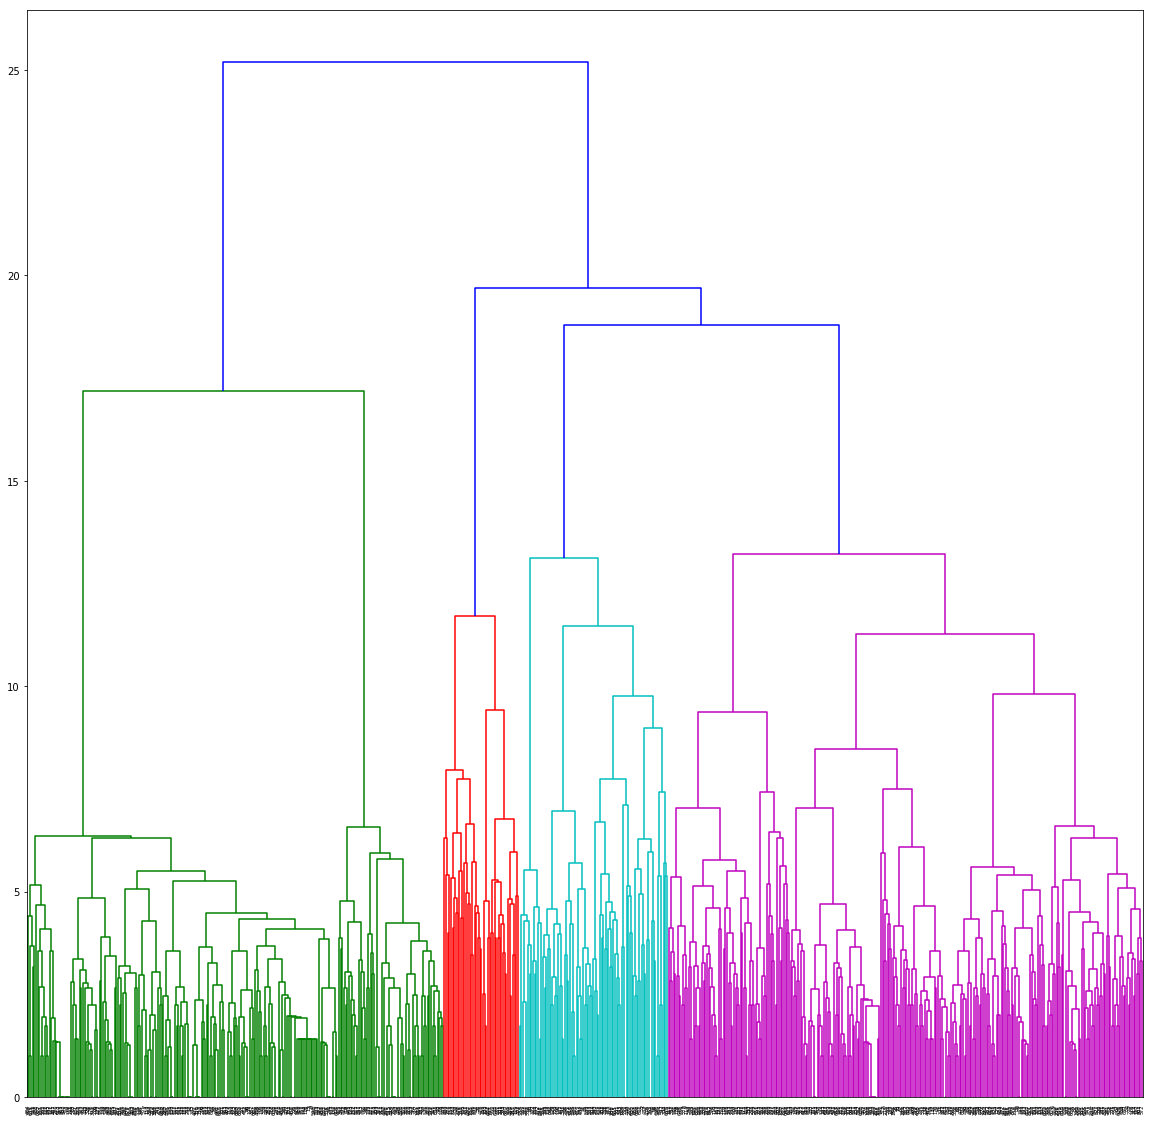

In [342]:
# Optimize number of clusters by KMeans distortion, normalized mutual information score, and adjusted rand score
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
import scipy.cluster.hierarchy as shc

df = np.array(df1.drop(columns='names').astype(float))

plt.figure(figsize=(20,20))
dend=shc.dendrogram(shc.linkage(df, method='ward'))
# Best separation occurs at k~40

In [343]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=40, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)



array([10, 17, 18, 15,  9,  4, 29, 15, 11, 15,  7, 28, 28, 12, 35, 15,  2,
       15, 14, 15, 15, 19, 10, 39, 15, 34, 10, 15, 11, 32, 17,  2,  8, 24,
        0, 18,  2, 17, 17,  7, 10, 34, 34, 28,  9, 28, 15, 23, 15, 33, 28,
       15, 28,  4, 28, 10,  7, 17,  3, 30, 30,  0,  3, 10,  3, 15, 25, 39,
       15,  9,  8,  9, 24, 15, 28, 15,  7, 10, 39, 39, 15, 11,  9, 13, 13,
       34,  9, 10,  3, 10, 25, 15,  7, 15,  0,  3, 15,  3, 10, 34, 24, 25,
       24, 15, 15, 15, 24, 10, 39,  7,  7, 33,  7, 15, 11, 15,  7, 11, 15,
       15,  9, 33, 33, 30, 10, 15, 11, 34, 15,  1, 25, 15, 15,  3, 32, 10,
       15, 28, 28,  6, 24, 15,  4,  7,  2, 10,  3, 15, 15, 34, 15, 34, 30,
       10, 25, 10, 15, 10, 15, 23, 15, 15, 29, 24, 15, 24,  7,  7, 10, 33,
       28, 10, 13,  7, 15, 15, 34,  3,  7, 24,  8,  7, 26, 26, 10, 19,  5,
        4, 22,  3, 10, 19, 24, 10, 15, 15, 17,  7,  7, 12, 10, 33, 12, 10,
        3, 28, 29, 10,  4, 32, 19, 28, 23, 15,  3, 15, 23,  1, 17, 15,  3,
       17, 22,  7, 12, 15

[t-SNE] Computing 67 nearest neighbors...
[t-SNE] Indexed 667 samples in 0.005s...
[t-SNE] Computed neighbors for 667 samples in 0.161s...
[t-SNE] Computed conditional probabilities for sample 667 / 667
[t-SNE] Mean sigma: 0.636749
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.184570
[t-SNE] KL divergence after 2000 iterations: 1.226333


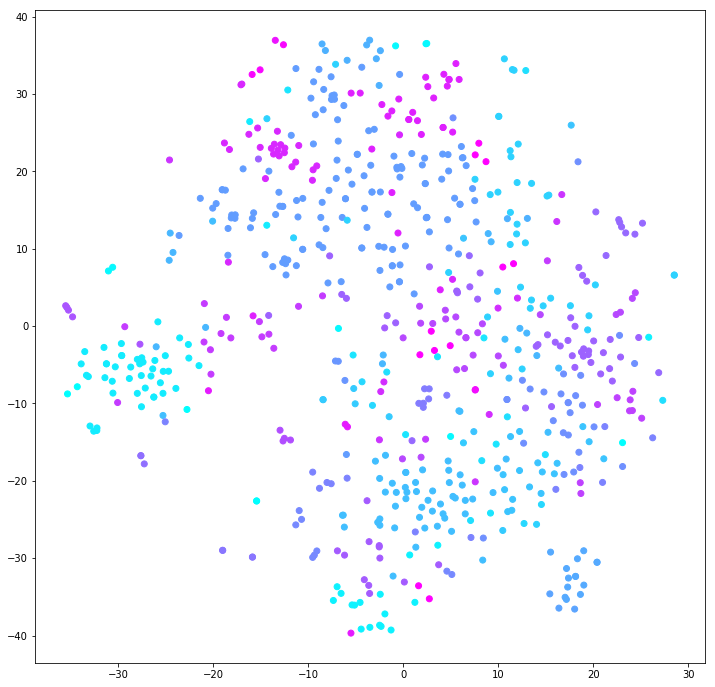

In [344]:
from sklearn.manifold import TSNE
np.random.seed(777)
tsne=TSNE(n_components=2, verbose=1, perplexity=22, n_iter=10000) # perplexity determined by 667 entries / 40 clusters ~ 22
results=tsne.fit_transform(df)
plt.figure(figsize=(12,12))
plt.scatter(results[:,0], results[:,1], c=cluster.labels_, cmap='cool')

Working with 40 clusters seems to give good separation.

In [345]:
df1['clusters'] = cluster.labels_
df1['clusters'].value_counts()


15    132
10     57
3      46
24     43
7      40
34     28
17     27
33     26
28     24
9      22
2      17
30     17
13     14
19     13
25     13
11     12
39     11
23     11
12     10
29      9
18      8
20      7
1       7
4       7
5       7
8       7
0       6
31      5
32      5
26      5
27      4
21      4
35      4
6       4
14      3
16      3
38      3
22      3
37      2
36      1
Name: clusters, dtype: int64

In [346]:
print(df1.loc[df1['clusters']==36]['names'])
print(df1.loc[df1['clusters']==36][df1==1].dropna(axis=1).columns.values)

563    Spectre
Name: names, dtype: object
['Agility' 'Accelerated Healing' 'Dimensional Awareness' 'Stealth'
 'Energy Absorption' 'Flight' 'Marksmanship' 'Longevity' 'Intelligence'
 'Super Strength' 'Telepathy' 'Energy Blasts' 'Duplication'
 'Size Changing' 'Density Control' 'Stamina' 'Super Speed' 'Possession'
 'Electrokinesis' 'Darkforce Manipulation' 'Death Touch' 'Teleportation'
 'Magic' 'Immortality' 'Phasing' 'Astral Projection' 'Fire Control'
 'Invulnerability' 'Energy Constructs' 'Force Fields' 'Psionic Powers'
 'Elasticity' 'Animation' 'Precognition' 'Hypnokinesis' 'Animal Control'
 'Heat Generation' 'Gravity Control' 'Light Control' 'Levitation'
 'Time Travel' 'Illusions' 'Water Control' 'Omnilingualism'
 'Time Manipulation' 'Invisibility' 'Sub-Mariner' 'Vision - Heat'
 'Reality Warping']


In [347]:
df2 = df1.loc[(df1['clusters'] != 36) & (df1['clusters'] != 37)] # These clusters have < 3 entries
df2['clusters'].value_counts()

15    132
10     57
3      46
24     43
7      40
34     28
17     27
33     26
28     24
9      22
30     17
2      17
13     14
25     13
19     13
11     12
23     11
39     11
12     10
29      9
18      8
8       7
5       7
1       7
20      7
4       7
0       6
26      5
31      5
32      5
27      4
6       4
21      4
35      4
38      3
22      3
14      3
16      3
Name: clusters, dtype: int64

In [348]:
#Run this cell, select an entry from the drop down menu, then run the next cell
import random
a=[36,37]
c=[]
for i in range(5):
    b = random.randint(0,39)
    while b in a: 
        b = random.randint(0,39)
    c.append(b)
    a.append(b)
e=[]
for i in c:
    df_temp=df2.loc[df2['clusters']==i]
    df_temp=df_temp.reset_index(drop=True)
    d = random.randint(0,len(df_temp)-1)
    e.append(df_temp.iloc[d,:]['names'])

print("Select your favorite hero")
dd = widgets.Dropdown(options=e, disabled=False)
dd

    

Select your favorite hero


Dropdown(options=('King Kong', 'X-Man', 'Doctor Doom II', 'Odin', 'Jean Grey'), value='King Kong')

In [350]:
df2_temp=df2.loc[df2['names']==dd.value]
#print(dd.value+" has the following powers:")
#print(df2_temp.dropna(axis=1).drop(columns=['names', 'clusters']).columns.values)

v = df2_temp['clusters'].values
df3_temp = df2.loc[df2['clusters'].isin(v)].reset_index(drop=True)
np.random.seed()
aa=[dd.value]
cc=[]
for i in range(2):
    bb = random.randint(0,len(df3_temp)-1)
    while df3_temp.iloc[bb,:]['names'] in aa:
        bb = random.randint(0,len(df3_temp)-1)
    aa.append(df3_temp.iloc[bb,:]['names'])
    cc.append(df3_temp.iloc[bb,:]['names'])

print("If you like", dd.value+", then you may also like", cc[0], "or", cc[1]+".")


If you like Doctor Doom II, then you may also like Binary or Darkstar.
